In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
cf3  = np.genfromtxt('cf3.csv' , delimiter='|', filling_values=-1, names=True, dtype=None, encoding=None)
pgc_cf3 = cf3['PGC']
DM_cf3  = cf3['DM']
eDM_cf3 = cf3['eDM']
N_cf3   = cf3['N']  
C_cf3   = cf3['C']  
F_cf3   = cf3['F']
I_cf3   = cf3['I']
S_cf3   = cf3['S']
H_cf3   = cf3['H']
VVmod_cf3 = cf3['Vmod']
Ks_cf3 = cf3['Ks']

In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
table = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ip  = table["pgc"]
p2  = table["P0_w2"]
p2p = table["P0_w2p"]
p1  = table["P0_w1"]
rs  = table["R_source"]



In [5]:
for i, id in enumerate(ip):
    
    if id==28120: #p1[i]!=0:
        delta = np.abs(p1[i]-p2[i])
#         if delta > 1.7:
        print id, p1[i], p2[i], p2p[i], '%.1f'%delta, rs[i]

            


28120 13.13 13.47 14.18 0.3 2


In [6]:
table = np.genfromtxt('DMs_EDD.csv.test' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod_edd   = table['Vmod']
Vls_edd   = table['Vls']

ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

RS = table['RS']
P0 = table['P0']

I = iii-table['DMi']
W1 = w11-table['DM_w1']
g_i = ggg-iii
i_w = iii-w11

In [7]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
dDMr  = table['dDMr']
dDMi  = table['dDMi']
dDMz  = table['dDMz']
dDM_w1  = table['dDM_w1']

logHr = np.log10(Vmod_edd) - (DMr-25)/5.  
logHi = np.log10(Vmod_edd) - (DMi-25)/5.  
logHz = np.log10(Vmod_edd) - (DMz-25)/5.  
logHw1 = np.log10(Vmod_edd) - (DM_w1-25)/5.  

dlogHr  = dDMr/5.  
dlogHi  = dDMi/5.  
dlogHz  = dDMz/5.  
dlogHw1 = dDM_w1/5. 

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encounte

In [8]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']

faint = np.genfromtxt('TF_faint.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_faint = drop['PGC']

In [9]:
keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop and not idd in pgc_faint:
        
        keep[i] = 1
    else:
        p+=1

        
print p

474


In [10]:
indx_op, = np.where((Vmod_edd>4000) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1) & (logWimx>0) & (RS>-1) & (DMr>0) & (DMi>0) & (DMz>0))

indx_ir, = np.where((Vmod_edd>4000) & (w11>0) & (Wqlt>3) & 
                 (keep==1) & (W1<-16.1) & (DM_w1>0))


font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [11]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [12]:
def plotHubble(ax, X, Y, Ye, indx, band=""):
    
    ax.plot(X, 10**Y, 'k.', alpha=0.1, mec='white', ms=5)
    

    for i in np.arange(0,18000, 1500):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1500 and Y[ii]>0 and Ye[ii]>0:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>0:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
            yy = np.sum(yp/ype)/np.sum(1./ype)
            
            if np.median(xp)>4000:
                ax.errorbar(np.mean(xp), 10**yy, yerr=10**yy*np.log(10.)*np.std(yp), xerr=np.std(xp), fmt='o', 
                        color='r', ms=6)     
            else:
                ax.errorbar(np.median(xp), 10**yy, yerr=10**yy*np.log(10.)*np.std(yp), xerr=np.std(xp), fmt='o', 
                        color='r', ms=6, mfc='white')  
#             print np.median(xp), yy, np.log(10.)*np.std(yp), np.std(xp)

#     m = np.median(Y[X>4000])
#     m = (np.sum(Y[X>4000]/Ye[X>4000])/np.sum(1./Ye[X>4000]))
    X  = X[indx]
    Y  = Y[indx]
    Ye = Ye[indx]

    def myHubble(D, H0):
        return H0


    fit, cov = curve_fit(myHubble, X, Y, sigma=Ye)
    m = fit[0]
    H0e_fit = 10**m*np.log(10.)*np.sqrt(cov[0])

    # H_rms = np.sqrt(np.sum((10**Y-H0_fit)**2)/(len(X)))

    H0 = 10**m
    print  H0

    ax.plot([4000,20000], [H0, H0], '--', color='blue')


    x_ax, y_ax = set_axes(ax, (0,20000), (45,120), fontsize=11) 

    ax.set_yscale('log')

    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(5))

    plt.yticks([50,60,70,80,90,100,110], ('50','60','70','80','90','100','110'))
    # ax.set_yticks(np.arange(50,140, step=10))



    y_ax.set_yticks(np.arange(45,120, step=10))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(10))
    y_ax.yaxis.set_minor_locator(MultipleLocator(5))


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.70*Xlm[0]+0.30*Xlm[1]
    y0 = 0.20*Ylm[0]+0.80*Ylm[1] 
    # y1 = 0.2*Ylm[0]+0.8*Ylm[1] 
    unit= '   km/s/Mpc'
    ax.text(x0,y0, r"$ \langle H_0 \rangle_{"+band+"}= $"+"%.1f" % H0+'$\pm$'+"%.1f" % H0e_fit+unit, fontsize=14, 
            color='blue', backgroundcolor='white')
    # ax.text(x0,y1, r"$rms = $"+"%.1f" % H_rms+unit,fontsize=12, color='k')

    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

    ax.errorbar(19000, 55, yerr=55*np.log(10.)*np.median(Ye), fmt='o', 
                        color='g', ms=6, mfc='white', capsize=2) 

74.8116427143734
74.70813861905742
74.79714074314282
76.01108498148268


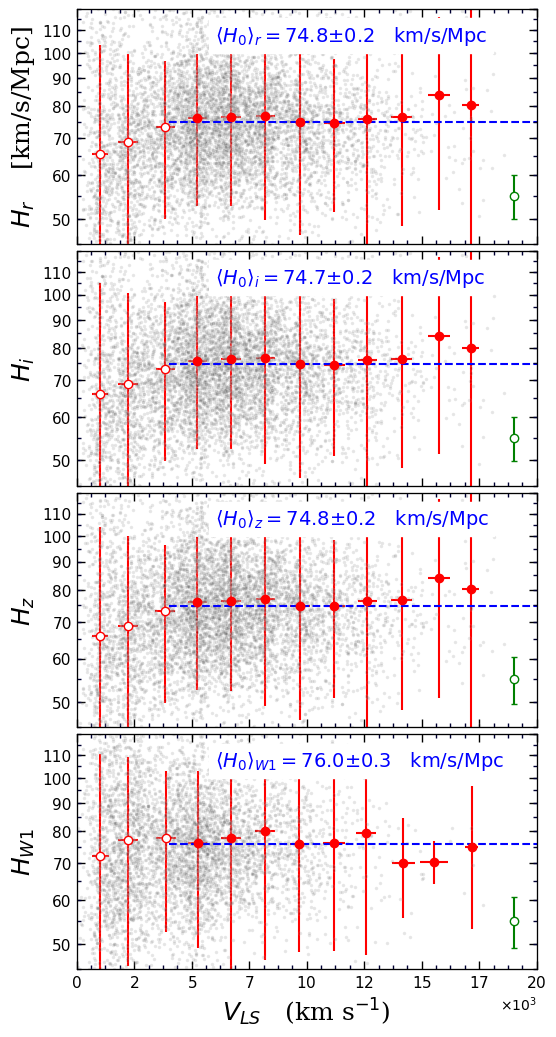

In [13]:
fig = py.figure(figsize=(5, 12), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

X  = Vls_edd
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHr
Ye = dlogHr
plotHubble(ax, X, Y, Ye, indx_op, band="r")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{r}$'+'    [km/s/Mpc]', fontsize=18, fontdict=font) 
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHi
Ye = dlogHi
plotHubble(ax, X, Y, Ye, indx_op, band="i")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{i}$', fontsize=18, fontdict=font) 
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHz
Ye = dlogHz
plotHubble(ax, X, Y, Ye, indx_op, band="z")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{z}$', fontsize=18, fontdict=font) 
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHw1
Ye = dlogHw1
plotHubble(ax, X, Y, Ye, indx_ir, band="W1")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{W1}$', fontsize=18, fontdict=font) 

ax.set_xlabel(r'$V_{LS} $'+'   (km s'+r'$^{-1}$'+')', fontsize=18, fontdict=font) 

plt.subplots_adjust(hspace=0.03, wspace=0.2)

In [14]:
def plotDM(ax, X, DM, dDM, indx):

    X  = X[indx]
    Y  = DM[indx]
    Ye = dDM[indx]
    
    ax.plot(X, Y, 'k.', alpha=0.05, mec='white', ms=7)
    
    indx, = np.where(np.abs(Y)<0.4)
    X  = X[indx]
    Y  = Y[indx]
    Ye = Ye[indx]    


    for i in np.arange(0,18000, 2000):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+2000:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>0:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
            yy = np.sum(yp/ype)/np.sum(1./ype)
            
            ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                        color='r', ms=6)     

    
    x_ax, y_ax = set_axes(ax, (0,20000), (-0.45,0.45), fontsize=11) 
    
    ax.plot([0, 20000], [0,0], '--', color='navy')
    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    
    print np.median(Y)
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.5*Xlm[0]+0.5*Xlm[1]
    y0 = 0.9*Ylm[0]+0.10*Ylm[1]
        
    RMS = np.sqrt(np.mean(Y**2))
    ax.text(x0,y0, r"$RMS$" +": %.2f [mag]" % RMS, fontsize=12, color='purple') 

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


0.0
0.0
0.00999999999999801


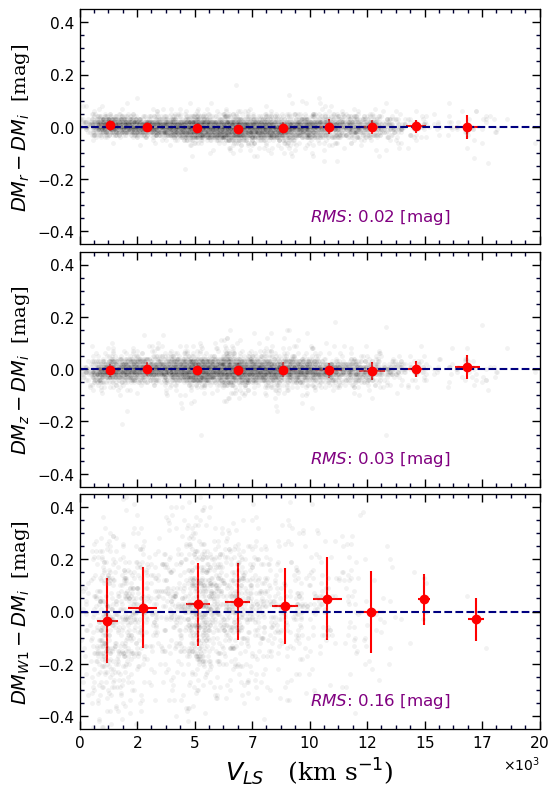

In [15]:
indx_op, = np.where((iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1) & (logWimx>0) & (RS>-1) & (DMr>0) & (DMi>0) & (DMz>0))

indx_ir, = np.where((w11>0) & (Wqlt>3) & (DM_w1>0) &
                 (keep==1) & (W1<-16.1) & (DM_w1>0) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (logWimx>0) & (RS>-1) & (DMr>0) & (DMi>0) & (DMz>0))


fig = py.figure(figsize=(5, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

X  = Vls_edd
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DMr-DMi
Ye = np.sqrt(dDMr**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_op)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_r-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DMz-DMi
Ye = np.sqrt(dDMz**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_op)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_z-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DM_w1-DMi
Ye = np.sqrt(dDM_w1**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_ir)
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1}-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 

ax.set_xlabel(r'$V_{LS} $'+'   (km s'+r'$^{-1}$'+')', fontsize=18, fontdict=font) 

plt.subplots_adjust(hspace=0.03, wspace=0.2)